In [11]:
import pandas as pd
import requests
import numpy as np
import time
from google.colab import userdata
from requests.exceptions import HTTPError
from urllib3.exceptions import MaxRetryError # Import MaxRetryError
polygon_key = userdata.get('polygon_api')

!pip install -U polygon-api-client

from polygon import RESTClient

In [5]:
#using api to get ticker detials
client = RESTClient(polygon_key)

details = client.get_ticker_details(
	"AAPL",
	)

details

TickerDetails(active=True, address=CompanyAddress(address1='ONE APPLE PARK WAY', address2=None, city='CUPERTINO', state='CA', country=None, postal_code='95014'), branding=Branding(icon_url='https://api.polygon.io/v1/reference/company-branding/YXBwbGUuY29t/images/2024-10-01_icon.png', logo_url='https://api.polygon.io/v1/reference/company-branding/YXBwbGUuY29t/images/2024-10-01_logo.svg', accent_color=None, light_color=None, dark_color=None), cik='0000320193', composite_figi='BBG000B9XRY4', currency_name='usd', currency_symbol=None, base_currency_name=None, base_currency_symbol=None, delisted_utc=None, description="Apple is among the largest companies in the world, with a broad portfolio of hardware and software products targeted at consumers and businesses. Apple's iPhone makes up a majority of the firm sales, and Apple's other products like Mac, iPad, and Watch are designed around the iPhone as the focal point of an expansive software ecosystem. Apple has progressively worked to add ne

In [5]:
#to open price, high price, low price, close price, volume, vwap, timestamps, transactions, and otc
#disadvantage: only 5 call per minute and can only get data up to 2 year

client = RESTClient(polygon_key)

#tickers = []
ticker = "AAPL"

aggs = []
for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2024-03-13", to="2025-03-13", limit=100000):
  aggs.append(a)
aggs

[Agg(open=173.31, high=173.31, low=173.31, close=173.31, volume=733, vwap=173.3635, timestamp=1710316800000, transactions=80, otc=None),
 Agg(open=173.25, high=173.25, low=173.25, close=173.25, volume=1204, vwap=173.242, timestamp=1710316980000, transactions=35, otc=None),
 Agg(open=173.2, high=173.2, low=173.2, close=173.2, volume=1685, vwap=173.1991, timestamp=1710317040000, transactions=82, otc=None),
 Agg(open=173.07, high=173.07, low=173.07, close=173.07, volume=792, vwap=173.0689, timestamp=1710317580000, transactions=17, otc=None),
 Agg(open=173.03, high=173.03, low=173.03, close=173.03, volume=485, vwap=173.0438, timestamp=1710317700000, transactions=32, otc=None),
 Agg(open=173, high=173, low=173, close=173, volume=1400, vwap=172.9971, timestamp=1710317760000, transactions=129, otc=None),
 Agg(open=172.96, high=172.96, low=172.96, close=172.96, volume=518, vwap=172.9581, timestamp=1710317820000, transactions=24, otc=None),
 Agg(open=173.1, high=173.11, low=173.1, close=173.1, 

In [7]:
#to change the time so it is easier to understandimport matplotlib.pyplot as plt

df = pd.DataFrame(aggs)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', origin='unix')
df

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,173.3100,173.3100,173.3100,173.3100,733.0,173.3635,2024-03-13 08:00:00,80,None
1,173.2500,173.2500,173.2500,173.2500,1204.0,173.2420,2024-03-13 08:03:00,35,None
2,173.2000,173.2000,173.2000,173.2000,1685.0,173.1991,2024-03-13 08:04:00,82,None
3,173.0700,173.0700,173.0700,173.0700,792.0,173.0689,2024-03-13 08:13:00,17,None
4,173.0300,173.0300,173.0300,173.0300,485.0,173.0438,2024-03-13 08:15:00,32,None
...,...,...,...,...,...,...,...,...,...
186605,210.2975,210.2975,210.2975,210.2975,569.0,210.2637,2025-03-13 23:55:00,23,None
186606,210.2000,210.3950,210.2000,210.2100,1958.0,210.2633,2025-03-13 23:56:00,22,None
186607,210.3500,210.3500,210.3200,210.3500,1335.0,210.3357,2025-03-13 23:57:00,24,None
186608,210.2001,210.2501,210.2001,210.2501,1269.0,210.2500,2025-03-13 23:58:00,15,None


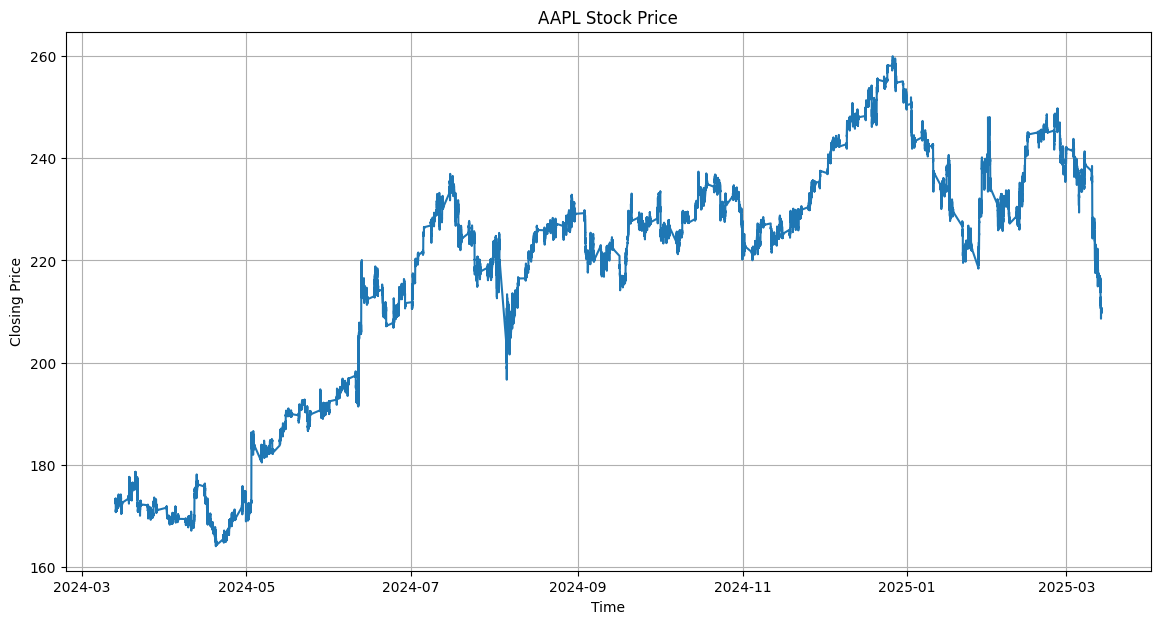

In [8]:
#to generate some graphs; like the stock market

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'timestamp' and 'close' columns

plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['close'])
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title(f'{ticker} Stock Price')
plt.grid(True)
plt.show()

#or

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'df' is your DataFrame with 'timestamp' and 'close' columns

plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['close'])

# Set x-axis limits to include all data points
plt.xlim(df['timestamp'].min(), df['timestamp'].max())

# Format x-axis ticks for better readability (optional)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# Increased interval to 20 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))  # Adjust interval as needed
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better visibility

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title(f'{ticker} Stock Price')
plt.grid(True)
plt.show()


In [ ]:
#not useful (maybe), to get the ticker and informations of that company
#companies with a ticker starting with A

url2 = "https://api.polygon.io/v3/reference/tickers?date=2021-10-07&active=true&apiKey=" + polygon_key
resp = requests.get(url2)
data = resp.json()

dic = {'ticker' : [],
       'name' : [],
       'market' : [],
       'locale' : [],
       'primary_exchange' : [],
       'active': [],
       'currency_name': [],
       'last_updated_utc': []}

for i in range(0, len(data['results'])-1):
  dic['ticker'] += [data['results'][i]['ticker']]
  dic['name'] += [data['results'][i]['name']]
  dic['market'] += [data['results'][i]['market']]
  dic['locale'] += [data['results'][i]['locale']]
  dic['primary_exchange'] += [data['results'][i]['primary_exchange']]
  dic['active'] += [data['results'][i]['active']]
  dic['currency_name'] += [data['results'][i]['currency_name']]
  dic['last_updated_utc'] += [data['results'][i]['last_updated_utc']]

df = pd.DataFrame(dic)
df

In [ ]:
#not complete, but this is use for that it will search for the data the users' want

client = RESTClient(polygon_key)
def pand(ticker):

  # List Aggregates (Bars)
  aggs = []
  for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2024-03-11", to="2025-03-11", limit=100000):
    aggs.append(a)
  if aggs != []:
    df = pd.DataFrame(aggs)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', origin='unix')

    return df

  return "Ticker not found"

ticker = input("What ticker's data do you want to see?: ")
df = pand(ticker)


In [12]:
#examples ticker of the top technology software companies:

enterprise_software = {
    'AAPL': 'Apple',
    'MSFT': 'Microsoft',
    'GOOG': 'Alphabet',
    'ORCL': 'Oracle',
    'SAP': 'SAP',
    'CRM': 'Salesforce',
    'IBM': 'IBM',
    'PLTR': 'Palantir',
    'NOW': 'ServiceNow',
    'ADBE': 'Adobe',
    'INTU': 'Intuit',
    'SU.PA': 'Schneider Electric',
    'SHOP': 'Shopify',
    'PANW': 'Palo Alto Networks',
    'ADP': 'Automatic Data Processing',
    'APP': 'AppLovin',
    'CRWD': 'CrowdStrike',
    'MSTR': 'MicroStrategy',
    'FTNT': 'Fortinet',
    'CSU.TO': 'Constellation Software',
    'SNPS': 'Synopsys',
    'CDNS': 'Cadence Design Systems',
    'WDAY': 'Workday',
    'TEAM': 'Atlassian',
    'DSY.PA': 'Dassault Systèmes',
    'ADSK': 'Autodesk',
    'SNOW': 'Snowflake',
    'FICO': 'FICO',
    'NET': 'Cloudflare',
    'VEEV': 'Veeva Systems',
    'WKL.AS': 'Wolters Kluwer',
    'DDOG': 'Datadog',
    'AMS.MC': 'Amadeus IT Group',
    'HUBS': 'HubSpot',
    'ZS': 'Zscaler',
    'ANSS': 'ANSYS',
    'TTD': 'The Trade Desk',
    'KEYS': 'Keysight',
    'CHKP': 'Check Point Software',
    'TYL': 'Tyler Technologies',
    'ZM': 'Zoom',
    'IOT': 'Samsara',
    'SSNC': 'SS&C Technologies',
    'OKTA': 'Okta',
    'TOST': 'Toast',
    'NTAP': 'NetApp',
    'KKS.F': 'Kaspi.kz Joint Stock Company',
    'PTC': 'PTC',
    'NTNX': 'Nutanix',
    'WTC.AX': 'WiseTech Global'}




#more ticker if necessary, source: https://companiesmarketcap.com/software/largest-software-companies-by-market-cap/
# 'LDOS', 'DOCU', 'TRMB', 'AZPN', 'GEN', 'CYBR',
# 'FDS', 'GRRE', 'PME.AX', 'SGE.L', 'XRO.AX', 'TWLO', 'FFIV',
# 'MDB', 'DT', 'ZBRA', 'MEM.F', 'RBRK', 'MNDY', 'DSY', 'AKAM',
# 'MBLY', 'AUR', '4716.T', 'PAYC', 'SAIL', 'MANH', 'PCTY', 'PCOR',
# 'EPAM', 'ESTC', 'DOX', 'ALTR', 'KVYO', 'NICE', 'CFLT', '4704.T',
# 'G', 'DAY', 'U', 'DSGX', 'GTLB', 'TTAN', '600588.SS', '2413.T',
# 'TOI.V', 'SMAR', '9719.T', 'ENPH', 'DBX']

In [15]:
#function that will take in the ticker and look up the data
#also takes into account of the call restraint
#will add all the data to a list that can then be generated out in a for loop
#will also add an extra column and name so we know which company it is and what is the ticker, can always remove this if we want to
#because of the call restraint, this function takes a long time to run = disadvantage
#to get 50 tickers' data, i think it might 30mins

def pand2(ticker):

  aggs = []
  try:
    for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2024-03-11", to="2025-03-11", limit=100000):
      aggs.append(a)

  except MaxRetryError:
          print(f"Rate limit hit for ticker: {ticker}. Waiting and retrying...")
          time.sleep(60)  # Wait for a minute
          return pand2(ticker)  # Retry the request

  if aggs != []:
      df = pd.DataFrame(aggs)
      df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', origin='unix')
      df['ticker'] = ticker
      #return df

      # Set the DataFrame title (style attribute)
      title = f"{enterprise_software.get(ticker)} Stock Data"  # Get company name for title
      styled_df = df.style.set_caption(title)

      return styled_df  # Return the styled DataFrame

  else:
      print(f"No data found for {ticker}")
      return None

client = RESTClient(polygon_key)
all_dfs = []
tickers = list(enterprise_software.keys())

for ticker in tickers:
    print(f"Processing ticker: {ticker}")
    df = pand2(ticker)
    if df is not None:
        all_dfs.append(df)
    #time.sleep(12) #need to change the time around so we can collect data faster

all_dfs

Processing ticker: AAPL


KeyboardInterrupt: 

In [9]:
#to display out the graphs

from IPython.display import display
for styled_df in all_dfs:
    display(styled_df)

NameError: name 'all_dfs' is not defined